In [3]:
from Neuro_Plotting.plot import plot_surf_parc
import numpy as np
import os

In [7]:
parcs = os.listdir('../parcels/')
parcs = [os.path.join('../parcels/', p) for p in parcs]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
p = np.load('../parcels/vol-resamp-difumo-64_prob.npy')

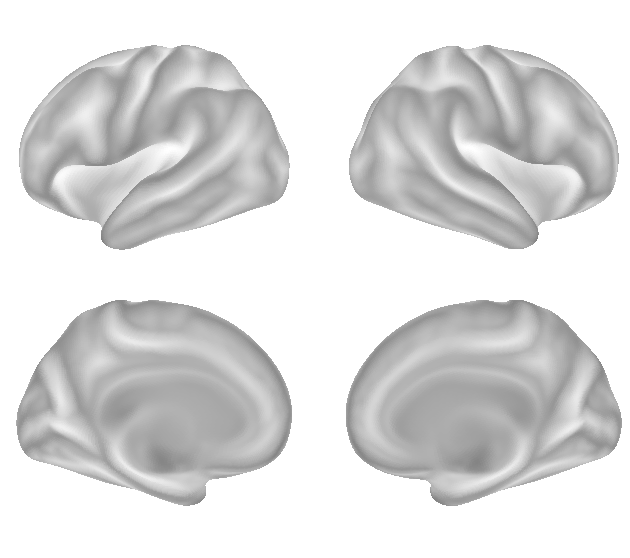

In [13]:
plot_surf_parc(p[:, 1])